In [1]:
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras.datasets import fashion_mnist

tf.__version__

'2.5.0'

In [2]:
# Only for Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# See where tensorflow Cpu / Gpu is running
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12526042039942961590
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14509932544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12672827139812913709
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [4]:
# Load and split Dataset 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Normalize Dataset

X_train = X_train / 255.0

X_test = X_test / 255.0

In [6]:
# We transform each 28x28 pixel image into a vector

X_train = X_train.reshape(-1, 28*28)

X_test = X_test.reshape(-1, 28*28)

In [7]:
# We have 60,000 images transformed into vectors of 784 elements (28x28)

X_train.shape

(60000, 784)

In [8]:
# We define the neural network model
model = tf.keras.models.Sequential()

# Add the first fully connected layer (Dense layer)
# 256 Neurons, activation function: ReLU, 784 large of vector
model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(784, )))

# Add a Dropout layer
# Regularization technique where certain neurons of the network are randomly assigned the value zero to reduce the chances of overfitting
model.add(tf.keras.layers.Dropout(0.1))

# Add the second layer (output layer)
# units: number of classes (10 in the case of Fashion MNIST), activation function: 'softmax' (probabilities of each class)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Copile the model
# Use adam optimizer and loss with Sparse softmax (categorical) crossentropy 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
# We train the model

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4928 - sparse_categorical_accuracy: 0.8246
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3750 - sparse_categorical_accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.8773
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3184 - sparse_categorical_accuracy: 0.8828
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3003 - sparse_categorical_accuracy: 0.8891
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2881 - sparse_categorical_accuracy: 0.8927
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2778 - sparse_categorical_accuracy: 0.8960
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2655 - sparse_categorical_accuracy: 0.9009
Epoch 9/20
1875/1875 [==========

In [10]:
# Test the model

test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - sparse_categorical_accuracy: 0.8938


In [11]:
# Save the model

model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
# Save model weight

model.save_weights("fashion_model.h5")

In [13]:
# We tested other neural network configurations

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(784, )))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(784, )))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [14]:
# We train the new model

number_of_cycles = 20
epoch_per_cycle = 3

loss_data = []
accuracy_data = []
epoch_data = []
cycle_data = []

for x in range (number_of_cycles):
    model.fit(X_train, y_train, epochs=epoch_per_cycle)
    print ("---------------------------")
    print (" Cycle Number: {}, Epoch Number: {}".format(x+1, (x+1)*epoch_per_cycle))
    print (" True efficiency is")
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    loss_data.append(test_loss)
    accuracy_data.append(test_accuracy)
    epoch_data.append((x+1)*epoch_per_cycle)
    cycle_data.append(x+1)
    print ("---------------------------")

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4926 - sparse_categorical_accuracy: 0.8210
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - sparse_categorical_accuracy: 0.8611
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.8737
---------------------------
 Cycle Number: 1, Epoch Number: 3
 True efficiency is
313/313 [==============================] - 1s 2ms/step - loss: 0.3550 - sparse_categorical_accuracy: 0.8691
---------------------------
Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3204 - sparse_categorical_accuracy: 0.8808
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3026 - sparse_categorical_accuracy: 0.8880
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2880 - sparse_categorical_accuracy: 0.8931
---------------------------
 Cycle Number: 2, Epoch Number: 6


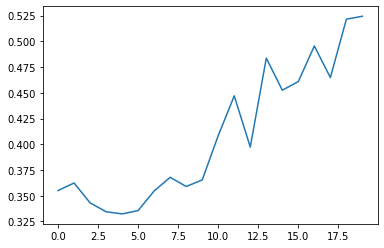

In [15]:
# underfitting to overfitting 
plt.plot(loss_data)

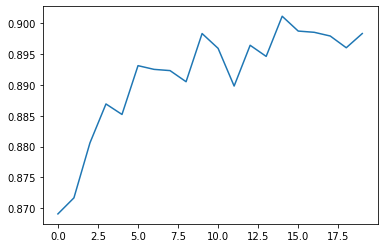

In [16]:
plt.plot(accuracy_data)